# Ejercicio 56
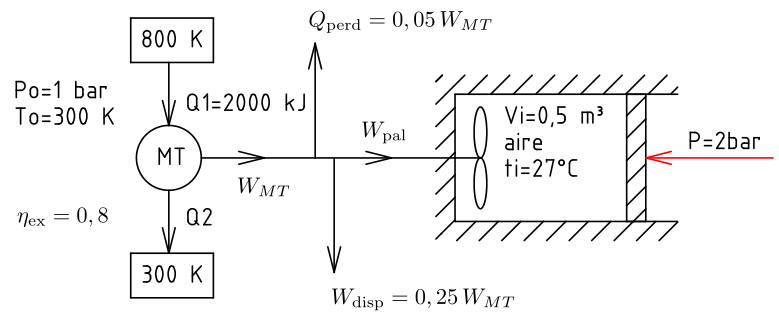

Calcular:
1. $\Delta S_u$
2. $\eta_{ex,proc}$

## Solución

In [ ]:
# Datos:
T_1 = 800 # [K]
T_2 = 300 # [K]
Q_1 = 2000e3 # [J]
P_0 = 1e5 # [Pa]
T_0 = 300 # [K]
n_ex = 0.8

$$ \Delta S_1 = \frac{Q_1}{T_1} $$

In [ ]:
DS_1 = Q_1/T_1

In [ ]:
#@title
print('DS_1 = %.2f [kJ/K]'%(DS_1/1000))

DS_1 = 2.50 [kJ/K]


$$ Q_{U1} = Q_1 - T_0 \Delta S_1 $$

In [ ]:
Q_U1 = Q_1 - T_0*DS_1

In [ ]:
#@title
print('Q_U1 = %.0f [kJ]'%(Q_U1/1000))

Q_U1 = 1250 [kJ]


$$ \eta_{ex} = \frac{W_{MT}}{|Q_{U1}|} \qquad \rightarrow \qquad W_{MT} = \eta_{ex} |Q_{U1}| $$

In [ ]:
W_MT = n_ex*abs(Q_U1)

In [ ]:
#@title
print('W_MT = %.0f [kJ]'%(W_MT/1000))

W_MT = 1000 [kJ]


$$ |W_{MT}| = |Q_1| - |Q_2| $$

$$ |Q_2| = |Q_1| - |W_{MT}| $$

In [ ]:
Q_2 = Q_1 - W_MT

In [ ]:
#@title
print('Q_2 = %.0f [kJ]'%(Q_2/1000))

Q_2 = 1000 [kJ]


$$ \Delta S_2 = \frac{Q_2}{T_2} $$

In [ ]:
DS_2 = Q_2/T_2

In [ ]:
#@title
print('DS_2 = %.2f [kJ/K]'%(DS_2/1000))

DS_2 = 3.33 [kJ/K]


$$ \Delta S_{uMT} = \Delta S_1 + \Delta S_2 $$

In [ ]:
DS_uMT = DS_1 + DS_2

In [ ]:
#@title
print('DS_uMT = %.2f [kJ/K]'%(DS_uMT/1000))

DS_uMT = 5.83 [kJ/K]


$$ W_{pal} = W_{MT} - Q_{perd} - W_{disp} $$

In [ ]:
Q_perd = 0.05*W_MT
W_disp = 0.25*W_MT

In [ ]:
W_pal = W_MT - Q_perd - W_disp

In [ ]:
#@title
print('W_pal = %.0f [kJ]'%(W_pal/1000))

W_pal = 700 [kJ]


$\begin{array}{l|l|l}
\mbox{N}^\circ & \mbox{Ecuación} & \mbox{Ingcógnita} \\
\hline
1) & \Delta U + W_{\Delta V} + W_{pal} = 0 & \Delta U, \, W_{\Delta V} \\
2) & \Delta U = m_A c_v (T_f - T_i) & T_f \\
3) & \Delta S_A = m_a c_p \ln (T_f/T_i) & \Delta S_A \\
4) & P_{ext} V_i = m_A R_A T_i & m_A \\
5) & P_{ext} V_f = m_A R_A T_f & V_f
\end{array}$

## Pistón
Cálculo de la masa en el pistón

$$ m_A = \frac{P_{ext} V_i}{R T_i} $$

In [ ]:
# Datos:
P_p = 200e3 # [Pa]
T_i = 27 + 273.15 # [K]
R_A = 0.287e3 # [J/(kg·K)]
V_i = 0.5 # [m^3]

In [ ]:
m_A = (P_p*V_i)/(R_A*T_i)

In [ ]:
#@title
print('m_A = %.2f [kg]'%m_A)

m_A = 1.16 [kg]


$$ \Delta U + W_{\Delta V} = W_{pal} $$

$\Delta U = m_a c_p (T_f - T_i)$

$W_{\Delta V} = P_{ext} (V_f - V_i)$

$\displaystyle V_f = \frac{m_A R T_f}{P_{ext}}$

Reemplazando
$$ m_A c_v (T_f - T_i) + P_{ext} \left( \frac{m_A R T_f}{P_{ext}} - V_i \right) = W_{pal} $$

Despejamos $T_f$
$$ {T_f}=\frac{{T_i} {c_v} {m_A}+{W_{\mathit{pal}}}+{P_p} {V_i}}{\left( {c_v}+{R_A}\right)  {m_A}} $$

In [ ]:
# Datos:
c_v = 0.7176e3 # [J/(kg·K)]
c_p = 1.0047e3 # [J/(kg·K)]

In [ ]:
import sympy as sp

In [ ]:
T_final = sp.symbols('T_final')
V_f = (m_A*R_A*T_final)/P_p
W_DV = P_p*(V_f - V_i)
DU = m_A*c_p*(T_final - T_i)

In [ ]:
eq1 = sp.Eq(DU + W_DV , W_pal)

In [ ]:
sol = sp.solve([eq1],[T_final])

In [ ]:
T_f = sol[T_final]
V_f = V_f.subs({T_final:T_f})
W_DV = W_DV.subs({T_final:T_f})
D_U = DU.subs({T_final:T_f})

In [ ]:
#@title
print('T_f = %.2f [K]'%T_f)
print('t_f = %.2f [°C]'%(T_f - 273.15))

T_f = 766.98 [K]
t_f = 493.83 [°C]


In [ ]:
#@title
print('V_f = %.2f [m^3]'%V_f)
print('W_DV = %.2f [kJ]'%(W_DV/1000))

V_f = 1.28 [m^3]
W_DV = 155.53 [kJ]


$T_0 = T_2$

$$ \Delta S_A = c_p \ln \frac{T_f}{T_i} + R_A \ln \frac{V_f}{V_i} $$

In [ ]:
DS_A = c_p*sp.log(T_f/T_i) + R_A*sp.log(V_f/V_i)

In [ ]:
#@title
print('DS_A = %.3f [kJ/K]'%(DS_A/1000))

DS_A = 1.212 [kJ/K]


$$ \Delta U + W_{\Delta V} = W_{pal} $$

In [ ]:
D_U/1000

544.468529844394

In [ ]:
DU = W_pal - W_DV

In [ ]:
#@title
print('DU = %.2f [kJ/K]'%(DU/1000))

DU = 544.47 [kJ/K]


$$ \Delta Ex_A = \Delta U - T_0 \Delta S_A $$

In [ ]:
DEx_A = DU - T_0*DS_A

In [ ]:
#@title
print('DEx_A = %.2f [kJ]'%(DEx_A/1000))

DEx_A = 180.92 [kJ]


$$ \eta_{ex,proc} = \frac{W_{\Delta V} + \Delta Ex_A + W_{disp} + Q_{perd}}{|Q_{U1}|} $$

In [ ]:
n_exproc = (W_DV + DEx_A + W_disp - Q_perd)/abs(Q_U1)

In [ ]:
#@title
print('n_exproc = %.2f'%n_exproc)

n_exproc = 0.43


$$ \Delta S_u = \Delta S_1 + \Delta S_2 + \Delta S_A $$

In [ ]:
DS_u = -DS_1 + DS_2 + DS_A

In [ ]:
#@title
print('DS_u = %.2f [kJ/K]'%(DS_u/1000))

DS_u = 2.05 [kJ/K]
